# Convolution

Animated visualizer for convolution.

In [1]:
%matplotlib inline

import time

import matplotlib.pyplot as plt
from scipy.signal import gaussian

from neurodsp.filt.fir import *

from neurodsp.sim import sim_powerlaw
from neurodsp.plts import plot_time_series
from neurodsp.utils import create_samples

from neurodsp.utils import set_random_seed

In [2]:
import seaborn as sns
sns.set_context('talk')

In [3]:
# Import local code
from vcode.gif import clear_output, _gif_plot_output
from vcode.utils import yield_sig as yield_sig2

## Setup

Setup for creating the convolution visualizer.

### Settings

In [19]:
# Signal settings
n_seconds = 1.
fs = 250

In [26]:
# Gifmaking settings
SAVE = False

In [20]:
# Set random seed
set_random_seed(505)

### Plot Functions

In [21]:
def plot_sig_kernel(sig, samps, kernel, ax=None):
    """Plot a signal with an overlying kernel."""
    
    if not ax:
        _, ax = plt.subplots(figsize=[12, 2])
        
    ax.plot(sig, color='black', alpha=0.25)
    ax.plot(samps, sig[samps], marker='.', markersize=2.5, linewidth=0, color='blue')
    ax.plot(samps, kernel*25 - 0.5, color='red', alpha=0.75)

    ax.set(xlim=[0, len(sig)], ylim=[-3.5, 3.5])        
    ax.set(xticks=[], yticks=[], xlabel='', ylabel='');
    
def plot_convolution(samples, convolved, ax=None):
    """Plot the output of a convolution."""
    
    if not ax:
        _, ax = plt.subplots(figsize=[12, 2])

    ax.plot(samples, convolved, alpha=0.5, color='green')
    
    ind = np.where(~np.isnan(convolved))[0][-1]
    ax.plot(samples[ind], convolved[ind], '.', markersize=12, color='green', alpha=0.75)

    ax.set(xlim=[0, len(sig)], ylim=[-3.5, 3.5])
    ax.set(xticks=[], yticks=[], xlabel='', ylabel='');

### Build Functions

In [27]:
def make_axes():
    """Make axes for combined plot.

    Placement definitions: Left, Bottom, Width, Height
    """
    
    fig = plt.figure()
    ax1 = fig.add_axes([0.0, 0.5, 1.7, 0.45])
    ax2 = fig.add_axes([0.0, 0.0, 1.7, 0.45])
    
    return fig, [ax1, ax2]


def build_all(sig, kernel, sleep=0.025, save=False):
    """Build all plots together."""
    
    samples = create_samples(len(sig))
    convolved = np.ones(len(sig)) * np.nan
    halfwid = int(np.ceil(len(kernel)/2))
        
    for ind in range(0, len(sig)-len(kernel) + 1, 1):
        
        clear_output(wait=True)
        fig, axes = make_axes()
        
        convolved[ind+halfwid] = np.dot(sig[samps+ind], kernel)

        plot_sig_kernel(sig, samps+ind, kernel, ax=axes[0])
        plot_convolution(samples, convolved, ax=axes[1])
        
        _gif_plot_output(fig, save, ind, label='03_conv', sleep=sleep)

## Animation

Wrods, words, words,

### Create Signal

In [18]:
sig = sim_powerlaw(n_seconds, fs, f_range=(2, None))

### Create Kernel

In [7]:
kernel = gaussian(51, 10, sym=True) * 0.1

In [8]:
samps = create_samples(len(kernel))

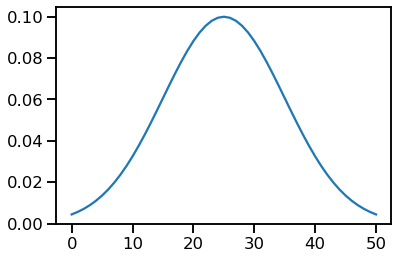

In [9]:
plt.plot(kernel)

### Plot signal & kernel

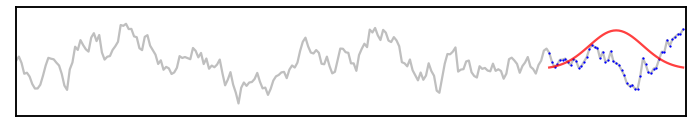

In [11]:
for ind in range(0, len(sig)-len(kernel) + 1, 1):
    clear_output(wait=True)
    plot_sig_kernel(sig, samps+ind, kernel)
    time.sleep(0.025)
    plt.show()

### Plot convolution output

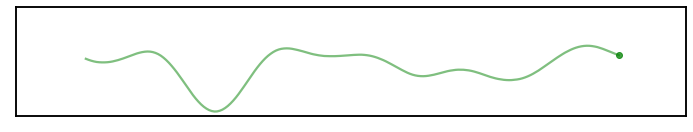

In [24]:
samples = create_samples(len(sig))
convolved = np.ones(len(sig)) * np.nan
halfwid = int(np.ceil(len(kernel)/2))

for ind in range(0, len(sig)-len(kernel) + 1, 1):
    
    clear_output(wait=True)
    
    convolved[ind+halfwid] = np.dot(sig[samps+ind], kernel)
    plot_convolution(samples, convolved)
    
    time.sleep(0.025)
    plt.show()

## Make Combined Animation

In [28]:
build_all(sig, kernel, save=True)

## Check convolution

Since we are computing the convolution manually, double check we get the expected results.

In [16]:
# Compute the expected output of the convolution, from numpy
expected = np.convolve(kernel, sig, 'valid')

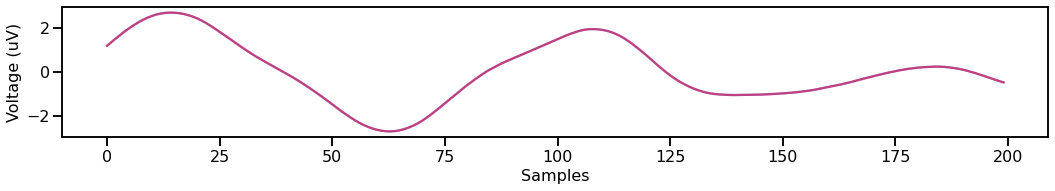

In [17]:
# Plot the expected and computed convolution
plot_time_series(None, [expected, convolved[~np.isnan(convolved)]],
                 alpha=0.5, colors=['b', 'r'])